<a href="https://colab.research.google.com/github/bomiiisong/DeepLearning-with-Python/blob/master/NLP/DNN_IMDB_Embedding_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB - Embedding with DNN

> ## NLP(Natural Language Processing)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Import keras

* keras version 확인

In [ ]:
import keras   

keras.__version__

'2.4.3'

## I. IMDB Data_Set Load & Review

> ### 1) Load IMDB Data_Set

* Word to Vector
전체 데이터 내에서 단어의 사용빈도에 따라 인덱스화
* 정수 인덱스 '11'은 11번째로 자주 사용된 단어를 나타냄
* num_words = 10000 : 인덱스 값 10000 이하의 단어만 추출
    * 단어 인덱스 값이 10000을 넘지 않는 단어만 분석에 사용

In [ ]:
from keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


> ### 2) Visualization & Frequency

* x : Histogram(리뷰 길이)

리뷰 최대 길이 :  2494
리뷰 평균 길이 :  238.71364


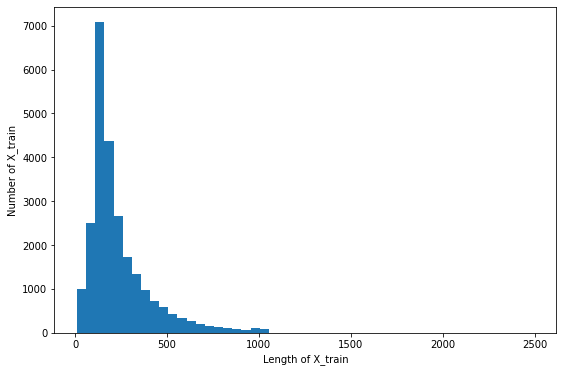

In [ ]:
import matplotlib.pyplot as plt

print('리뷰 최대 길이 : ', max(len(L) for L in X_train))
print('리뷰 평균 길이 : ', sum(map(len, X_train)) / len(X_train))

plt.figure(figsize=(9,6))
plt.hist([len(L) for L in X_train], bins=50)
plt.xlabel('Length of X_train')
plt.ylabel('Number of X_train')
plt.show()

y : Frequency(0:부정, 1:긍정)

In [ ]:
import numpy as np

unique_elements, counts_elements = np.unique(y_train, return_counts=True)

print('Label 빈도수 : ')
print(np.asarray((unique_elements, counts_elements)))

Label 빈도수 : 
[[    0     1]
 [12500 12500]]


## II. Tensor Transformation

> ### 1) X_train & X_test : (25000, 10000)

* vectorization
    * (25000, 10000)

In [ ]:
from keras import preprocessing

X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=10000)
X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=10000)

X_train.shape, X_test.shape

((25000, 10000), (25000, 10000))

* Transformation Check

In [ ]:
print(X_train[0][:21])
print(X_train[0][9979:])

print(X_test[0][:21])
print(X_test[0][9979:])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[ 226   65   16   38 1334   88   12   16  283    5   16 4472  113  103
   32   15   16 5345   19  178   32]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  14  286  170    8  157   46    5   27  239   16  179    2   38   32
   25 7944  451  202   14    6  717]


> ### 2) y_train & y_test

In [ ]:
y_train = np.asarray(y_train).astype(float)
y_test = np.asarray(y_test).astype(float)

print(y_train[:21])
print(y_test[:21])

[1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.]
[0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]


## III. Keras Embedding Modeling


> ### 1) Model Define

* 모델 신경망 구조 정의
    * Embedding Dimension : 32

In [ ]:
from keras import models
from keras import layers

imdb = models.Sequential()

imdb.add(layers.Embedding(10000, 32, input_length=10000))

imdb.add(layers.Flatten())

imdb.add(layers.Dense(16))
imdb.add(layers.Dropout(0.5))
imdb.add(layers.Dense(1, activation='sigmoid'))

* Model Summary

In [ ]:
imdb.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10000, 32)         320000    
_________________________________________________________________
flatten (Flatten)            (None, 320000)            0         
_________________________________________________________________
dense (Dense)                (None, 16)                5120016   
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 5,440,033
Trainable params: 5,440,033
Non-trainable params: 0
_________________________________________________________________


> ### 2) Model Compile

* 모델 학습방법 설정

In [ ]:
imdb.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

> ### 3) Model Fit

* 약 20 분 소요

In [ ]:
%%time

Hist_imdb = imdb.fit(X_train, y_train, epochs=50, batch_size=512,
                     validation_data=(X_test, y_test))

Epoch 1/50
49/49 [==============================] - 30s 542ms/step - loss: 2.0267 - accuracy: 0.4960 - val_loss: 0.6638 - val_accuracy: 0.5264
Epoch 2/50
49/49 [==============================] - 26s 531ms/step - loss: 0.5824 - accuracy: 0.7337 - val_loss: 0.3779 - val_accuracy: 0.8558
Epoch 3/50
49/49 [==============================] - 26s 530ms/step - loss: 0.3169 - accuracy: 0.8916 - val_loss: 0.2944 - val_accuracy: 0.8777
Epoch 4/50
49/49 [==============================] - 26s 528ms/step - loss: 0.2207 - accuracy: 0.9289 - val_loss: 0.2734 - val_accuracy: 0.8846
Epoch 5/50
49/49 [==============================] - 26s 527ms/step - loss: 0.1737 - accuracy: 0.9469 - val_loss: 0.2825 - val_accuracy: 0.8814
Epoch 6/50
49/49 [==============================] - 26s 529ms/step - loss: 0.1387 - accuracy: 0.9627 - val_loss: 0.2762 - val_accuracy: 0.8864
Epoch 7/50
49/49 [==============================] - 26s 531ms/step - loss: 0.1052 - accuracy: 0.9760 - val_loss: 0.2862 - val_accuracy: 0.8840

> ### 4) 학습 결과 시각화

* Loss Visualization

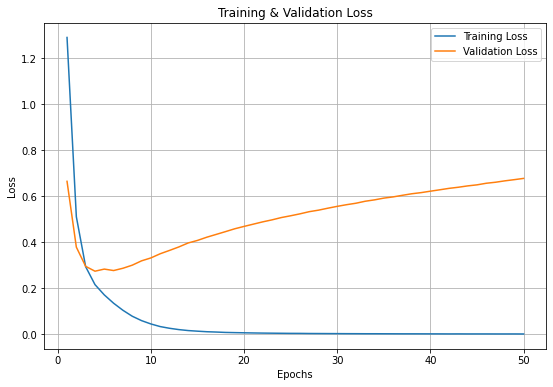

In [ ]:
epochs = range(1, len(Hist_imdb.history['loss']) + 1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_imdb.history['loss'])
plt.plot(epochs, Hist_imdb.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

* Accuracy Visualization

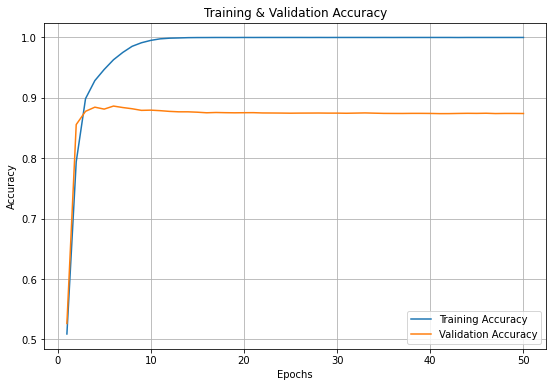

In [ ]:
epochs = range(1, len(Hist_imdb.history['accuracy']) + 1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_imdb.history['accuracy'])
plt.plot(epochs, Hist_imdb.history['val_accuracy'])
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

> ### 5) Model Evaluate

* Loss & Accuracy


In [ ]:
loss, accuracy = imdb.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

782/782 [==============================] - 11s 15ms/step - loss: 0.6766 - accuracy: 0.8741
Loss = 0.67659
Accuracy = 0.87408
